In [8]:
import numpy as np
from keras.models import Sequential # conda install -c conda-forge keras
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [9]:
df=pd.read_csv('rainfalldata.csv')

In [10]:
df

,Date,precipitation,temperature,relative humidity,wind speed
0,1990-01-01,6,2,30,7
1,1990-02-01,116,6,53,11
2,1990-03-01,141,26,68,11
3,1990-04-01,196,6,43,7
4,1990-05-01,160,6,84,12
...,...,...,...,...,...
377,2021-06-01,1,13,57,8
378,2021-07-01,221,33,43,7
379,2021-08-01,258,7,29,9
380,2021-09-01,52,9,30,6


Text(0.5, 0, 'parameters')

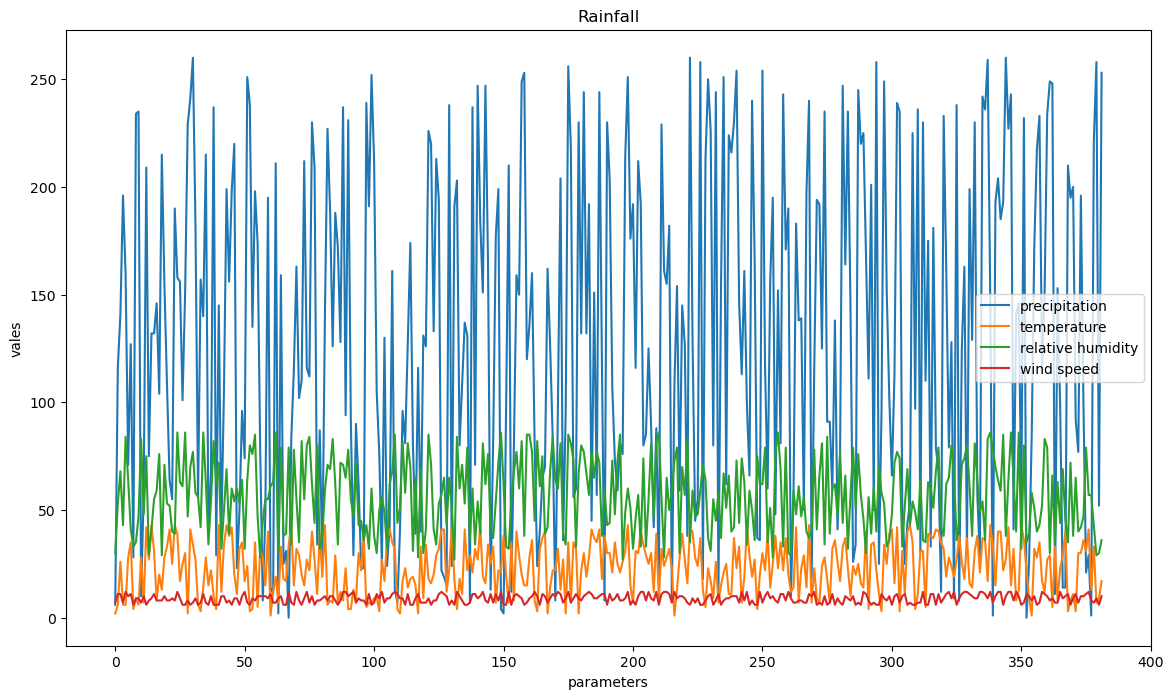

In [11]:
df.plot(kind='line',figsize=(14,8))
plt.title('Rainfall')
plt.ylabel('vales')
plt.xlabel('parameters')


In [12]:
train_dates=pd.to_datetime(df['Date'])

In [13]:
train_dates

0     1990-01-01
1     1990-02-01
2     1990-03-01
3     1990-04-01
4     1990-05-01
         ...    
377   2021-06-01
378   2021-07-01
379   2021-08-01
380   2021-09-01
381   2021-10-01
Name: Date, Length: 382, dtype: datetime64[ns]

In [14]:
cols=list(df)[1:2]
print(cols)

['precipitation']


<Axes: >

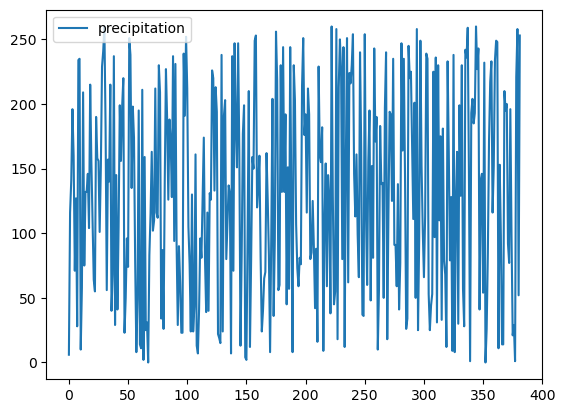

In [15]:
training_df=df[cols].astype(float)
plot_df=training_df
plot_df.plot.line()

In [16]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar=scalar.fit(training_df)
training_df_scaled=scalar.transform(training_df)

In [21]:
#Lists for storing the training data considering multiple variables
#trainX for storing training data (temperature, wind speed, relative humidity)
#trainY form string target values (rainfall)
trainX=[]
trainY=[]

n_past=20 #20 values will be considered to predit the next values
n_fut=100 #for prediting the next 100 value based on previous 20 values

#Adding the values to trainX and trainY lists
for i in range(n_past, len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])
    
#Converting into numpy arrays
trainX,trainY=np.array(trainX),np.array(trainY)

print('trainX shape == {}'.format(trainX.shape)) #Knowing the shape
print('trainY shape == {}'.format(trainY.shape)) #Knowing the shape

trainX shape == (263, 20, 1)
trainY shape == (263, 1)


In [ ]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.3))
          
model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.3))
          
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()
